In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

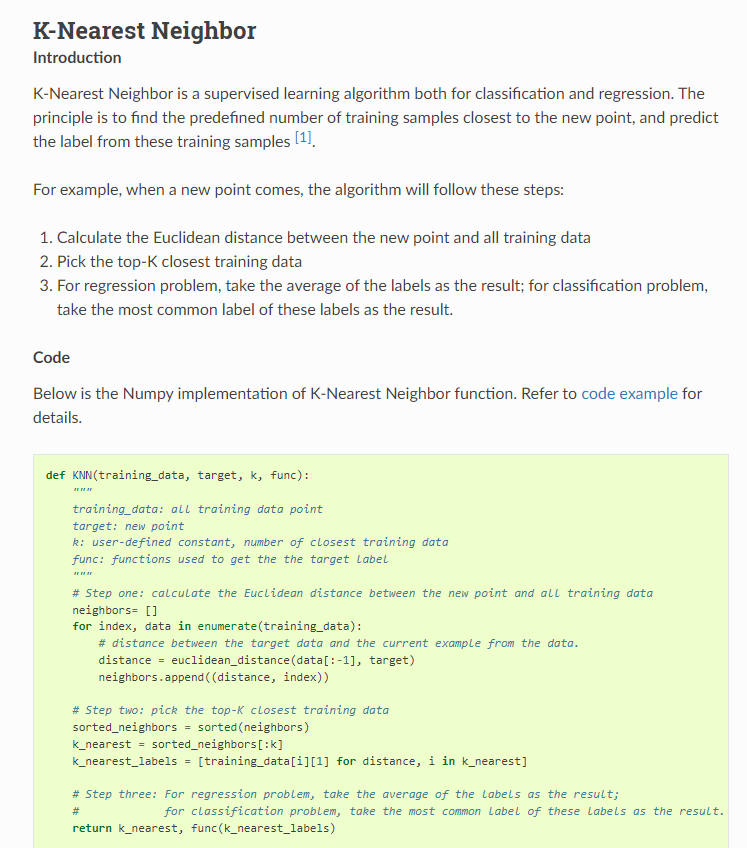

In [2]:
#to do list
#train test split function --> can it match the one in sklearn? 
# a function to take in k, x_train, y_train
# a fit function
# a predict function (within a function )
# a global euclilean and mahatten distance 
# a confusion matrix + acc function 

In [3]:
def homecook_train_test(X_, y_, seed=42, train_size_perc=0.8): 
    """train test split 
    X_: features
    y_: label
    """
    arr = np.column_stack( (X_,y_) )
    train_size = int(round(arr.shape[0] * train_size_perc,0))
    
    np.random.seed(seed)
    np.random.shuffle(arr)
    X = arr[:, :X_.shape[1]]
    Y = arr[:, -1:].ravel() #-- in case , flatten the 2d array in to 1d 
    
    x_train, x_test, y_train, y_test = X[:train_size,:], X[train_size:, :], Y[:train_size, ], Y[train_size:,]

    return (x_train, x_test, y_train, y_test)

In [4]:
X.shape, y.shape

((178, 4), (178,))

In [5]:
def calculate_distance(p1, p2 , type_ = "euclidean"):
    """this is to calculate distance
    choice of:
    1. euclidean
    2. manhattan
    """
    if type_ == "euclidean":
        dist = np.sqrt(np.sum((p1 - p2)**2))
    elif type_ == "manhattan": 
        dist = np.sum(np.abs(p1 - p2))
    return (dist) 

# X is your training data, y is your training outputs, X_ are your testing data and y_ are your predicted outputs for X_
def mykNN(X, y, X_, options):
    """X : training data
       y : training labels
       X_: testing data
       y_pred: predicted outputs for X_
       options: indication of number of k,
                indication of distance_type (only euclidean or manhattan allowed)
    """
    k, distance_type = options #unpacks k and the distance type 
    
    def prediction_for_one_x (x):
        
        if (k % 2) == 0:
            #1. compute the distance (with the appropriate distance type) against each of the training data
            distances = [calculate_distance(x, one_x, distance_type) for one_x in X]
            #2. sort the compiled distances, pick the top k shortest, note that argsort returns index position
            index_position_of_neighbors = np.argsort(distances)[:k]
            #3 find the corresponding y_labels via the index position of the neighbors 
            y_labels = y[index_position_of_neighbors]
            #4. find the most common labels among the k neighbors 
            counts_ = np.bincount(list(y_labels))
            recommended_neighbor = np.argmax(counts_)
        else:
            #1. compute the distance (with the appropriate distance type) against each of the training data
            distances = [calculate_distance(x, one_x, distance_type) for one_x in X]
            #2. sort the compiled distances, pick the top k shortest, note that argsort returns index position
            index_position_of_neighbors = np.argsort(distances)[:k]
            #3 find the corresponding y_labels via the index position of the neighbors 
            y_labels = y[index_position_of_neighbors]
            #4. find the most common labels among the k neighbors 
            counts_ = np.bincount(list(y_labels))
            recommended_neighbor = np.argmax(counts_)
        
        return(recommended_neighbor)
    
    y_pred = np.array([prediction_for_one_x(x) for x in X_],dtype=int)
    
    return(y_pred)

In [6]:
x_train, x_test, y_train, y_test = homecook_train_test(X, y, seed=42, train_size_perc=0.8)
y_test = y_test.astype(int)

y_ = mykNN(x_train, y_train, x_test, options=[3,"euclidean"])
accuracy = np.sum(y_test == y_) / len(y_test)
accuracy

0.9166666666666666

In [7]:
x_train, x_test, y_train, y_test = homecook_train_test(X, y, seed=42, train_size_perc=0.8)
y_test = y_test.astype(int)

y_ = mykNN(x_train, y_train, x_test, options=(3,"euclidean"))
accuracy = np.sum(y_test == y_) / len(y_test)
accuracy

0.9166666666666666

In [8]:
#x_train

In [9]:
y_ = mykNN(x_train, y_train, x_test, options=[3,"manhattan"])
accuracy = np.sum(y_test == y_) / len(y_test)
accuracy

0.9166666666666666

In [10]:
y_ = mykNN(x_train, y_train, x_test, options=[5,"euclidean"])
accuracy = np.sum(y_test == y_) / len(y_test)
accuracy

0.9444444444444444

In [11]:
y_ = mykNN(x_train, y_train, x_test, options=[5,"manhattan"])
accuracy = np.sum(y_test == y_) / len(y_test)
accuracy

0.9444444444444444

In [12]:
def my_confusion_matrix(y_test, y_pred, classno):
    c_matrix = np.zeros([classno, classno])
    for i in range(0, len(y_test)):
        c_matrix[y_test[i],y_pred[i]]+=1
    return (c_matrix)

In [13]:
def my_accuracy(y_test,y_pred):
    sum_of_1 = sum(np.where(y_test == y_pred, 1, 0))
    total_len = len(y_test)
    
    A = sum_of_1/total_len
    return (A)

In [14]:
#use my_confusion_matrix function as above

def my_precision(y_test,y_pred):
    #TP / (TP+FP)
    classes = np.unique(y_test)
    precision = np.zeros(classes.shape) 
    
    confusion_matrix = my_confusion_matrix(y_test, y_pred, len(classes))
    
    for i in classes:
        precision[i] = confusion_matrix[i , i]/ sum(confusion_matrix[: , i])
                                                #all rows, freeze at column i 
    return (precision)

In [15]:
def my_recall(y_test,y_pred):
    #TP/ (TP+FN)
    classes = np.unique(y_test)
    recall = np.zeros(classes.shape) 
    
    confusion_matrix = my_confusion_matrix(y_test, y_pred, len(classes))
    
    for i in classes:
        recall[i] = confusion_matrix[i , i]/ sum(confusion_matrix[i , :])
    
    return (recall)

In [16]:
classno = len(np.unique(y)) #i find this neater 

print(my_confusion_matrix(y_test, y_, classno))
print(my_accuracy(y_test,y_))

[[11.  0.  0.]
 [ 2. 12.  0.]
 [ 0.  0. 11.]]
0.9444444444444444


In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score

print(confusion_matrix(y_test,y_))
print(accuracy_score(y_test,y_))

[[11  0  0]
 [ 2 12  0]
 [ 0  0 11]]
0.9444444444444444


In [18]:
print('classes:      %s' % np.unique(y_) )    
print('my precision: %s' % my_precision(y_test,y_))
print('my recall:    %s' % my_recall(y_test,y_))

classes:      [0 1 2]
my precision: [0.84615385 1.         1.        ]
my recall:    [1.         0.85714286 1.        ]


In [19]:
print(precision_score(y_test,y_,average=None))

[0.84615385 1.         1.        ]


In [20]:
print(recall_score(y_test,y_,average=None))

[1.         0.85714286 1.        ]


In [21]:
print(classification_report(y_test,y_))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



## Welcome to nested cross val 

In [22]:
# parameters for testing code
mySeed= 42
nFolds = 5
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)
indices #these are the positions of the outer loops

[array([ 19,  45, 140,  30,  67,  16, 119, 174, 109, 141,  24, 150,  41,
        118,  15, 111, 113,  82,   9, 114,  18,  66,  60, 169, 171, 164,
        117,  65,  90,  55,  29, 128, 145,  31,  12,  42]),
 array([158, 137,  98, 159,  38, 108,  85,  68, 143,   2, 100, 122, 154,
         51,  76,  56,  26, 153, 138, 104,  78,  36,  93,  22, 146,  97,
         69, 167,  11,   6,  27, 144,   4,  32,  95, 170]),
 array([ 75,  10, 147, 123,   0, 142, 126,  64,  44,  96,  28,  40, 127,
         25,  23, 132,  81,  79,  84,  39, 101,  86, 120, 173, 162,  47,
         94, 135, 166,  61,  73,  33, 125, 133, 139,  62]),
 array([176, 112, 115, 105,  53,   5, 160,   3, 165,  49,  35,  80,  77,
         34,  46,   7, 124,  43,  70, 136, 110,  91,  83, 156, 161,  89,
          8,  13,  59, 152, 131,  17,  72, 155, 134]),
 array([148, 163,  63,  54, 107,  50, 175,  58,  48,  88,  21,  57, 172,
        129,  37, 157, 168,   1,  52, 149, 130, 151, 103,  99, 116,  87,
         74, 121, 177,  20,  71, 10

In [23]:
# myNestedCrossVal code

for iFold in range(0,nFolds):
    test_fold = indices[iFold]
    print('new iterration:', str(iFold))
    
    remaining_folds = np.delete(range(0,nFolds), iFold)
    #validationFold = indices[ remaining_folds[0] ] #wrong wrong wrong wrong wrong 
    train_val_fold = np.concatenate([indices[r] for r in remaining_folds], axis = 0) # this is the set crossval + hpt
    
#     print(test_fold)
#     print('-')
#     print(train_val_fold)
#     print(' ') --> send this to a cross val hpt function! 

new iterration: 0
new iterration: 1
new iterration: 2
new iterration: 3
new iterration: 4


In [24]:
def find_best_param(X, y,  k_n_distance_scenerios, mySeed): # inner loop -- job: GridSearchCV 
    x_train, x_test, y_train, y_test = homecook_train_test(X, y, seed=mySeed, train_size_perc=0.8)
    y_test = y_test.astype(int)
    
    #do 5 fold .. 
    #invoke myKnn in loops here
    val_scores = [] 
    for k, d in k_n_distance_scenerios:
        y_ = mykNN(x_train, y_train, x_test, options=[k,d])
        accuracy = np.sum(y_test == y_) / len(y_test)
        val_scores.append(accuracy)
    
    best_val_score= np.max(val_scores)
    best_params = k_n_distance_scenerios[np.argmax(val_scores)]
    
    #aim is to find the best params 
    
    return (best_params) #output best param

In [25]:
# x_train, x_test, y_train, y_test = homecook_train_test(XX, yy, seed=42, train_size_perc=0.8)
# y_test = y_test.astype(int)

# val_scores = [] #expect 20 acc_scores 
# for k, d in k_n_distance_scenerios:
#     y_ = mykNN(x_train, y_train, x_test, options=[k,d])
#     accuracy = np.sum(y_test == y_) / len(y_test)
#     val_scores.append(accuracy)

# val_scores

In [26]:
def myNestedCrossVal (X, y, no_of_folds, neighbor_parameter, distance_types ,mySeed): #"outer loop"
    nFolds = no_of_folds
    np.random.seed(mySeed)
    indices_ = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices_, nFolds)
    
    #creates all scenerios for k_n_distance --> do this in nested loops 
#     k_n_distance_scenerios = []
#     for r in itertools.product(neighbor_parameter , distance_types): 
#         k_n_distance_scenerios.append ( (r[0] , r[1]) )

    #creates all scenerios for k_n_distance --> do this in nested loops     
    k_n_distance_scenerios = []
    for n in neighbor_parameter:
        for d in distance_types: 
            k_n_distance_scenerios.append ( (n , d) )
    
    collect_acc_scores = [] #5 models scores 
    best_k = []
    best_distance =[]
    for iFold in range(0,nFolds):
        test_fold = indices[iFold]
        remaining_folds = np.delete(range(0,nFolds), iFold)
        train_val_fold = np.concatenate([indices[r] for r in remaining_folds], axis = 0)
        
        best_param = find_best_param(X[train_val_fold], y[train_val_fold],  k_n_distance_scenerios, mySeed)
        best_k.append(best_param[0])
        best_distance.append(best_param[1])
        
        x_train, x_test, y_train, y_test = X[train_val_fold], X[test_fold], y[train_val_fold], y[test_fold]
        y_test = y_test.astype(int)
        
        y_ = mykNN(x_train, y_train, x_test, options=best_param)
        accuracy = np.sum(y_test == y_) / len(y_test)
        collect_acc_scores.append(accuracy)
        #fit the best param back into KNN with test_fold
        
    data_ = {'Fold':list(np.arange(1,nFolds+1)), 
             'accuracy':collect_acc_scores, 
             'k':best_k, 
             'distance':best_distance}
    
    df = pd.DataFrame(data_)
    return(df)
#return (indices, k_n_distance_scenerios)

In [27]:
mySeed= 24
accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
accuracies_fold

,Fold,accuracy,k,distance
0,1,0.944444,3,euclidean
1,2,0.916667,5,manhattan
2,3,0.916667,5,manhattan
3,4,0.942857,3,euclidean
4,5,0.942857,1,euclidean


In [28]:
for iFold in range(0,nFolds):
    print(iFold)
    print (indices[iFold])
    print('new iterration')
    remaining_folds = np.delete(range(0,nFolds), iFold)
    print(remaining_folds)
    print(remaining_folds[0])
    validationFold = indices[ remaining_folds[0] ]
    print(validationFold)
    print("-")

0
[ 19  45 140  30  67  16 119 174 109 141  24 150  41 118  15 111 113  82
   9 114  18  66  60 169 171 164 117  65  90  55  29 128 145  31  12  42]
new iterration
[1 2 3 4]
1
[158 137  98 159  38 108  85  68 143   2 100 122 154  51  76  56  26 153
 138 104  78  36  93  22 146  97  69 167  11   6  27 144   4  32  95 170]
-
1
[158 137  98 159  38 108  85  68 143   2 100 122 154  51  76  56  26 153
 138 104  78  36  93  22 146  97  69 167  11   6  27 144   4  32  95 170]
new iterration
[0 2 3 4]
0
[ 19  45 140  30  67  16 119 174 109 141  24 150  41 118  15 111 113  82
   9 114  18  66  60 169 171 164 117  65  90  55  29 128 145  31  12  42]
-
2
[ 75  10 147 123   0 142 126  64  44  96  28  40 127  25  23 132  81  79
  84  39 101  86 120 173 162  47  94 135 166  61  73  33 125 133 139  62]
new iterration
[0 1 3 4]
0
[ 19  45 140  30  67  16 119 174 109 141  24 150  41 118  15 111 113  82
   9 114  18  66  60 169 171 164 117  65  90  55  29 128 145  31  12  42]
-
3
[176 112 115 105  53   

In [ ]:
nFolds = 5
np.random.seed(42)
indices_ = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices_, nFolds)

k_n_distance_scenerios = []
for r in itertools.product(list(range(1,11)),['euclidean','manhattan']):
    k_n_distance_scenerios.append ( (r[0] , r[1]) )
    
#for iFold in range(0,nFolds):
iFold = 0
test_fold = indices[iFold]
remaining_folds = np.delete(range(0,nFolds), iFold)
train_val_fold = np.concatenate([indices[r] for r in remaining_folds], axis = 0)
    
#len(X[train_val_fold]),len(X[test_fold])
XX = X[train_val_fold]
yy = y[train_val_fold]